# Machine Learning - Model to Determine if a Mushroom is Poisonous or Edible

The purpose of this assignment is to build a model that can be trained using a dataset of mushroom features; can find features that are common to edible or poisonous mushrooms; and, consequently, be used to predict whether a mushroom is likely to be edible. 

A Logistic Regression model will be used, and the reason for not using Linear Regression will be explained. A train-test-split will also be performed to see if this increases the accuracy of the model's prediction.

Dataset used: mushrooms.csv, from https://www.kaggle.com/uciml/mushroom-classification

## Implementation

Examples referenced: 

https://github.com/codebasics/py/tree/master/ML

https://www.kaggle.com/exterex/poisonous-mushroom-prediction

In [1]:
#import necessary libraries - these will be used for loading data, visualisation, and encoding
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#import the csv used, and show the first 5 lines
mushrooms_df = pd.read_csv("mushrooms.csv", encoding = "latin1")
mushrooms_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


##### Attribute Information (from https://archive.ics.uci.edu/ml/datasets/mushroom): 

classes: edible=e, poisonous=p

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [3]:
#describe the dataset
mushrooms_df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [4]:
#show the datatypes of each item in the dataset
mushrooms_df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

As there are a lot of different features, we need to select just a few to focus on. This will make the process of feature selection and prediction simpler.

According to Damian Brindle of RethinkSurvival.com, the most important features to look out for when determining the edibility of a mushroom are the cap shape, cap surface, cap color, odor, gill attachment, gill color, stalk shape, ring number, spore print color, population, and habitat. This is also backed up by other sources, such as Chris Deziel's "How to Identify Wild Mushrooms" on the Sciencing.com website. Therefore, while all other features are no doubt important in a real-world scenario, we can prune them from this example for simplicity. 

In [5]:
#drop irrelevant columns
m_df = mushrooms_df.drop(['bruises', 'gill-spacing', 'gill-size', 'stalk-root', 'stalk-surface-above-ring', 
                            'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'ring-type'],
                        axis = 1)
m_df.head()

,class,cap-shape,cap-surface,cap-color,odor,gill-attachment,gill-color,stalk-shape,veil-color,ring-number,spore-print-color,population,habitat
0,p,x,s,n,p,f,k,e,w,o,k,s,u
1,e,x,s,y,a,f,k,e,w,o,n,n,g
2,e,b,s,w,l,f,n,e,w,o,n,n,m
3,p,x,y,w,p,f,n,e,w,o,k,s,u
4,e,x,s,g,n,f,k,t,w,o,n,a,g


Note that in the following cells, 6 & 7, the character values of each column were substituted with the actual words they represent. However, as the dataset would have to be numerically encoded later, these steps were deemed unnecessary and ultimately omitted from the final process.

In [6]:
#change letters to their meaning according to the original description of the dataset
#this will make the dataset clearer
#the dataset will have to later be encoded, but for now this will make the dataset more human-readable
# m_df.loc[m_df['class'] == 'p', 'class'] = "poisonous"
# m_df.loc[m_df['class'] == 'e', 'class'] = "edible"
# m_df.head(5)

In [7]:
# #continuing to replace values with their matching words

# #cap shape
# m_df.loc[m_df['cap-shape'] == 'b', 'cap-shape'] = "bell"
# m_df.loc[m_df['cap-shape'] == 'c', 'cap-shape'] = "conical"
# m_df.loc[m_df['cap-shape'] == 'x', 'cap-shape'] = "convex"
# m_df.loc[m_df['cap-shape'] == 'f', 'cap-shape'] = "flat"
# m_df.loc[m_df['cap-shape'] == 'k', 'cap-shape'] = "knobbed"
# m_df.loc[m_df['cap-shape'] == 's', 'cap-shape'] = "sunken"

# #cap color
# m_df.loc[m_df['cap-color'] == 'n', 'cap-color'] = "brown"
# m_df.loc[m_df['cap-color'] == 'b', 'cap-color'] = "buff"
# m_df.loc[m_df['cap-color'] == 'c', 'cap-color'] = "cinnamon"
# m_df.loc[m_df['cap-color'] == 'g', 'cap-color'] = "gray"
# m_df.loc[m_df['cap-color'] == 'r', 'cap-color'] = "green"
# m_df.loc[m_df['cap-color'] == 'p', 'cap-color'] = "pink"
# m_df.loc[m_df['cap-color'] == 'u', 'cap-color'] = "purple"
# m_df.loc[m_df['cap-color'] == 'e', 'cap-color'] = "red"
# m_df.loc[m_df['cap-color'] == 'w', 'cap-color'] = "white"
# m_df.loc[m_df['cap-color'] == 'y', 'cap-color'] = "yellow"

# #odor
# m_df.loc[m_df['odor'] == 'a', 'odor'] = "almond"
# m_df.loc[m_df['odor'] == 'l', 'odor'] = "anise"
# m_df.loc[m_df['odor'] == 'c', 'odor'] = "creosote"
# m_df.loc[m_df['odor'] == 'a', 'odor'] = "almond"
# m_df.loc[m_df['odor'] == 'y', 'odor'] = "fishy"
# m_df.loc[m_df['odor'] == 'f', 'odor'] = "foul"
# m_df.loc[m_df['odor'] == 'm', 'odor'] = "musty"
# m_df.loc[m_df['odor'] == 'n', 'odor'] = "none"
# m_df.loc[m_df['odor'] == 'p', 'odor'] = "pungent"
# m_df.loc[m_df['odor'] == 's', 'odor'] = "spicy"

# #gill color
# m_df.loc[m_df['gill-color'] == 'k', 'gill-color'] = "black"
# m_df.loc[m_df['gill-color'] == 'n', 'gill-color'] = "brown"
# m_df.loc[m_df['gill-color'] == 'b', 'gill-color'] = "buff"
# m_df.loc[m_df['gill-color'] == 'h', 'gill-color'] = "chocolate"
# m_df.loc[m_df['gill-color'] == 'g', 'gill-color'] = "gray"
# m_df.loc[m_df['gill-color'] == 'r', 'gill-color'] = "green"
# m_df.loc[m_df['gill-color'] == 'o', 'gill-color'] = "orange"
# m_df.loc[m_df['gill-color'] == 'p', 'gill-color'] = "pink"
# m_df.loc[m_df['gill-color'] == 'u', 'gill-color'] = "purple"
# m_df.loc[m_df['gill-color'] == 'e', 'gill-color'] = "red"
# m_df.loc[m_df['gill-color'] == 'w', 'gill-color'] = "white"
# m_df.loc[m_df['gill-color'] == 'y', 'gill-color'] = "yellow"

# #veil color
# m_df.loc[m_df['veil-color'] == 'n', 'veil-color'] = "brown"
# m_df.loc[m_df['veil-color'] == 'o', 'veil-color'] = "orange"
# m_df.loc[m_df['veil-color'] == 'w', 'veil-color'] = "white"
# m_df.loc[m_df['veil-color'] == 'y', 'veil-color'] = "yellow"

# #ring number
# m_df.loc[m_df['ring-number'] == 'n', 'ring-number'] = "none"
# m_df.loc[m_df['ring-number'] == 'o', 'ring-number'] = "one"
# m_df.loc[m_df['ring-number'] == 't', 'ring-number'] = "two"

# #population
# m_df.loc[m_df['population'] == 'a', 'population'] = "abundant"
# m_df.loc[m_df['population'] == 'c', 'population'] = "clustered"
# m_df.loc[m_df['population'] == 'n', 'population'] = "numerous"
# m_df.loc[m_df['population'] == 's', 'population'] = "scattered"
# m_df.loc[m_df['population'] == 'v', 'population'] = "several"
# m_df.loc[m_df['population'] == 'y', 'population'] = "solitary"

# #habitat
# m_df.loc[m_df['habitat'] == 'g', 'habitat'] = "grasses"
# m_df.loc[m_df['habitat'] == 'l', 'habitat'] = "leaves"
# m_df.loc[m_df['habitat'] == 'm', 'habitat'] = "meadows"
# m_df.loc[m_df['habitat'] == 'p', 'habitat'] = "paths"
# m_df.loc[m_df['habitat'] == 'u', 'habitat'] = "urban"
# m_df.loc[m_df['habitat'] == 'w', 'habitat'] = "waste"
# m_df.loc[m_df['habitat'] == 'd', 'habitat'] = "woods"

# m_df.head()

### Encoding Non-numerical Data

Now that all our data is complete, it needs to be encoded. Categorical data cannot be processed unless this step is taken -  only numeric data can be passed through sklearn's prediction models. Methods of encoding used here are pandas dummy values, Label Encoding, and One-Hot Encoding.

(referenced from https://github.com/codebasics/py/blob/master/ML/5_one_hot_encoding/one_hot_encoding.ipynb)

#### Method One: Using Pandas dummies

One way of doing this to use the pandas.get_dummies() function.
This creates a new table that converts categorical data into "dummy" variables (“Pandas.get_dummies — Pandas 1.4.2 Documentation,” 2022). These "dummy"/indicator variables take a value of either 1 or 0; with 1 denoting a certain condition (eg. edible) is true, and 0 denoting it as false.

In [8]:
#encode each variable in the dataset to ones and zeroes
dummy_data = pd.get_dummies(m_df[['class','cap-shape','cap-surface','cap-color','odor','gill-attachment','gill-color','stalk-shape','veil-color','ring-number','spore-print-color','population','habitat']])
dummy_data.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [9]:
#merge the original m_df dataset with this new "dummy" one
merged_df = pd.concat([m_df, dummy_data], axis = 'columns')
merged_df

,class,cap-shape,cap-surface,cap-color,odor,gill-attachment,gill-color,stalk-shape,veil-color,ring-number,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,p,x,s,n,p,f,k,e,w,o,...,1,0,0,0,0,0,0,0,1,0
1,e,x,s,y,a,f,k,e,w,o,...,0,0,0,0,1,0,0,0,0,0
2,e,b,s,w,l,f,n,e,w,o,...,0,0,0,0,0,0,1,0,0,0
3,p,x,y,w,p,f,n,e,w,o,...,1,0,0,0,0,0,0,0,1,0
4,e,x,s,g,n,f,k,t,w,o,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,n,a,y,e,o,o,...,0,0,0,0,0,1,0,0,0,0
8120,e,x,s,n,n,a,y,e,n,o,...,0,1,0,0,0,1,0,0,0,0
8121,e,f,s,n,n,a,n,e,o,o,...,0,0,0,0,0,1,0,0,0,0
8122,p,k,y,n,y,f,b,t,w,o,...,0,1,0,0,0,1,0,0,0,0


In [10]:
#now drop the previous values from the merged version - only numeric values can be used
final_df = merged_df.drop(['class','cap-shape','cap-surface','cap-color','odor','gill-attachment','gill-color','stalk-shape','veil-color','ring-number','spore-print-color','population','habitat'], axis = 'columns')
final_df.head(10)

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
5,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
6,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
8,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
9,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


Certain variables of the dataset can be derived from others - this is known as multicollinearity. Multicollinearity occurs when two or more independent variables are correlated with one another in a regression model (Analytics Vidhya, 2020b).
In this example, if a mushroom is edible, it is reasonable to deduce that it cannot also be poisonous. Conversely, if a mushroom is poisonous, it cannot also be edible. 

Using the "dummy" values, if edible is denoted by a value of 0, and poisonous 1, then that mushroom is poisonous. However, if edible is denoted by a value of 1, and poisonous 0, then that mushroom is edible.

This means a lot of columns can be dropped, as certain characteristics, such as edibility, can be inferred from each other directly. It also means that both the "edible" and "poisonous" columns do not have to be included - keeping the "edible" one will suffice.

In [11]:
final_df = final_df.drop(['class_p',
                          'cap-shape_b','cap-shape_c','cap-shape_f','cap-shape_k','cap-shape_s',
                          'cap-surface_g','cap-surface_y','cap-surface_s',
                          'cap-color_b','cap-color_c','cap-color_g','cap-color_r','cap-color_p','cap-color_u','cap-color_e','cap-color_w','cap-color_y',
                          'odor_l', 'odor_c','odor_y','odor_f','odor_m','odor_n','odor_p','odor_s',
                          'gill-attachment_f',
                          'gill-color_n','gill-color_b','gill-color_h','gill-color_g','gill-color_r','gill-color_o','gill-color_p','gill-color_u','gill-color_e','gill-color_w','gill-color_y',
                          'stalk-shape_t',
                          'veil-color_o','veil-color_w','veil-color_y',
                          'ring-number_o','ring-number_t',
                          'spore-print-color_n','spore-print-color_b','spore-print-color_h','spore-print-color_r','spore-print-color_o','spore-print-color_u','spore-print-color_w','spore-print-color_y',
                          'population_c','population_n','population_s','population_v','population_y',
                          'habitat_l','habitat_m','habitat_p','habitat_u','habitat_w','habitat_d'
                         ], axis='columns')
final_df.head()

,class_e,cap-shape_x,cap-surface_f,cap-color_n,odor_a,gill-attachment_a,gill-color_k,stalk-shape_e,veil-color_n,ring-number_n,spore-print-color_k,population_a,habitat_g
0,0,1,0,1,0,0,1,1,0,0,1,0,0
1,1,1,0,0,1,0,1,1,0,0,0,0,1
2,1,0,0,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0,1,0,0
4,1,1,0,0,0,0,1,0,0,0,0,1,1


In [12]:
#now that we have our complete dataset, we can train a basic LogisticRegression model on it
#to do this, we must set the X and y values for our data
#the value of X will be the dataset minus the class of "edible" or "poisonous", as this is what we want the model to be able to predict
X = final_df.drop(['class_e'], axis = 'columns')
X

,cap-shape_x,cap-surface_f,cap-color_n,odor_a,gill-attachment_a,gill-color_k,stalk-shape_e,veil-color_n,ring-number_n,spore-print-color_k,population_a,habitat_g
0,1,0,1,0,0,1,1,0,0,1,0,0
1,1,0,0,1,0,1,1,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,1,0,0
4,1,0,0,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,1,0,1,0,0,0,0,0
8120,1,0,1,0,1,0,1,1,0,0,0,0
8121,0,0,1,0,1,0,1,0,0,0,0,0
8122,0,0,1,0,0,0,0,0,0,0,0,0


In [13]:
#now that we have our X value, we must set a y value
#the y value will be the columns dropped above - so "edible" and "poisonous"
y = final_df.class_e
y

0       0
1       1
2       1
3       0
4       1
       ..
8119    1
8120    1
8121    1
8122    0
8123    1
Name: class_e, Length: 8124, dtype: uint8

### Logistic Regression vs. Linear Regression

Linear regression is a supervised machine learning model in which the model finds the line of best fit between and independent and dependent variable (Analytics Vidhya, 2021). Logistic regression is defined as "a statistical analysis method used to predict a data value based on prior observations of a data set" (Rosencrance & Burns, 2017).

In this example, a Logistic Regression model will be used, and not Linear Regression. Linear regression is suited to predicting output of continuous values, such as property prices, but logistic regression is a better fit for classification (Jing, 2019). As the aim of this model is to classify a mushroom as poisonous or edible, logistic regression must be used.

In [14]:
#import the model used
#the sklearn model LogisticRegression will be used
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [15]:
#fit our X and y values into this model
model.fit(X,y)

LogisticRegression()

In [16]:
model.predict(X)

array([1, 1, 0, ..., 1, 0, 1], dtype=uint8)

In [17]:
#output the accuracy score of the model
model.score(X, y)

0.7956671590349581

From the above score, we can conclude that the prediction is about ~79% accurate. A mushroom classified by this model has a ~79 - 80% chance of being edible.

In [18]:
#input values into model to output a prediction - the output will be a 1 or 0
model.predict([[1,1,1,0,0,1,0,1,0,0,1,0]])

array([1], dtype=uint8)

According to this Logistic Regression model, a value less than 1 denotes a poisonous mushroom; a value of 1 or greater, an edible one. Based on the above prediction, a mushroom with these features is likely to be edible. As the model is about 79 - 80% accurate, this seems a fair assumption.

#### Method Two: OneHotEncoder

OneHot Encoding is the process of creating dummy variables based on the number of unique values in a dataset (Analytics Vidhya, 2020).

In [19]:
#one-hot encoding is another method that can be used to encode non-mumerical (categorical) data like the one used here
#sklearn has tools used for this purpose
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#LabelEncoder works by converting names of data into numbers

In [20]:
#show the encoded dataset
dfle = m_df
dfle['class'] = le.fit_transform(dfle['class'])
dfle['cap-shape'] = le.fit_transform(dfle['cap-shape'])
dfle['cap-surface'] = le.fit_transform(dfle['cap-surface'])
dfle['cap-color'] = le.fit_transform(dfle['cap-color'])
dfle['odor'] = le.fit_transform(dfle['odor'])
dfle['gill-attachment'] = le.fit_transform(dfle['gill-attachment'])
dfle['gill-color'] = le.fit_transform(dfle['gill-color'])
dfle['stalk-shape'] = le.fit_transform(dfle['stalk-shape'])
dfle['veil-color'] = le.fit_transform(dfle['veil-color'])
dfle['ring-number'] = le.fit_transform(dfle['ring-number'])
dfle['spore-print-color'] = le.fit_transform(dfle['spore-print-color'])
dfle['population'] = le.fit_transform(dfle['population'])
dfle['habitat'] = le.fit_transform(dfle['habitat'])
dfle.head(10)

,class,cap-shape,cap-surface,cap-color,odor,gill-attachment,gill-color,stalk-shape,veil-color,ring-number,spore-print-color,population,habitat
0,1,5,2,4,6,1,4,0,2,1,2,3,5
1,0,5,2,9,0,1,4,0,2,1,3,2,1
2,0,0,2,8,3,1,5,0,2,1,3,2,3
3,1,5,3,8,6,1,5,0,2,1,2,3,5
4,0,5,2,3,5,1,4,1,2,1,3,0,1
5,0,5,3,9,0,1,5,0,2,1,2,2,1
6,0,0,2,8,0,1,2,0,2,1,2,2,3
7,0,0,3,8,3,1,5,0,2,1,3,3,3
8,1,5,3,8,6,1,7,0,2,1,2,4,1
9,0,0,2,9,0,1,2,0,2,1,2,3,3


In the above table, each feature has been replaced with a numerical value. For example, in the 'class' column, 1 denotes the value of "poisonous", while 0 denotes "edible". (Note that in the previous example, 1 denoted that a mushroom was edible - the 1s and 0s functioned, effectively, as a "Yes" or "No" marker. However, with the LabelEncoder, values are encoded according to alphabetical position - thus, "edible" precedes "poisonous", and is given a value of 0, which precedes 1)

In [21]:
X = dfle.drop(columns = ['class']).values
X

array([[5, 2, 4, ..., 2, 3, 5],
       [5, 2, 9, ..., 3, 2, 1],
       [0, 2, 8, ..., 3, 2, 3],
       ...,
       [2, 2, 4, ..., 0, 1, 2],
       [3, 3, 4, ..., 7, 4, 2],
       [5, 2, 4, ..., 4, 1, 2]])

In [22]:
y = dfle[['class']].values
y

array([[1],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [23]:
#like LabelEncoder, OneHotEncoder can be used to convert categorical data to numerical data
#OneHotEncoder encodes data in such a way that it is not ordinal, ie. no value has a greater importance than another based solely on numeric order
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(dfle[['class']]).toarray())

In [24]:
# X = ct.fit_transform(X)
# X.shape, X

In [25]:
# y = ct.fit_transform(y)
# y.shape, y

In [26]:
#fit our X and y values into this model
model.fit(X,y)

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
#output the accuracy score of the model
model.score(X,y)

0.8508124076809453

The accuracy of the model is about ~85%.

In [28]:
#again, insert values into the model to see the prediction
model.predict([[1,3,7,3,1,5,0,2,0,3,3,5]])

array([1])

A mushroom with these features is likely to be poisonous, as denoted by the value of 1.

### Train-test-split

The train-test-split is an method of evaluating the performance of a machine-learning algorithm. It is commonly used for classification problems (Brownlee, 2020). Train-test split designates a certain percentage of data to function as "training" data (used to train the model) and "testing" data (used to test the model). It is important to note that if the percentage of training data is too low, the model may end up less accurate. However - if the percentage of testing data is also too low, it will be harder to make accurate predictions.

It can be employed here to test the model created above.

In [29]:
#sklearn has a tool for train-test split
from sklearn.model_selection import train_test_split

In [30]:
#our target is the information we want to predict - in this case, it is the class
#this target will form our y value
target = dfle['class']
target

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

In [31]:
#the data is what we want to "feed" into the predictive model to output our target
#it will form our X value
data = dfle[['cap-shape','cap-surface','cap-color','odor','gill-attachment','gill-color','stalk-shape','veil-color','ring-number','spore-print-color','population','habitat']]
data

,cap-shape,cap-surface,cap-color,odor,gill-attachment,gill-color,stalk-shape,veil-color,ring-number,spore-print-color,population,habitat
0,5,2,4,6,1,4,0,2,1,2,3,5
1,5,2,9,0,1,4,0,2,1,3,2,1
2,0,2,8,3,1,5,0,2,1,3,2,3
3,5,3,8,6,1,5,0,2,1,2,3,5
4,5,2,3,5,1,4,1,2,1,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,5,0,11,0,1,1,0,1,2
8120,5,2,4,5,0,11,0,0,1,0,4,2
8121,2,2,4,5,0,5,0,1,1,0,1,2
8122,3,3,4,8,1,0,1,2,1,7,4,2


In [32]:
#note that a test-size of between 20 - 30% produces optimum results
#here 20% of the data will be used to test the model - this means that 80% will be used to train it
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.20)
model.fit(X_train, y_train)

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
#evaluate the accuracy of the model
model.score(X_test, y_test)

0.856

This model is ~86% accurate.

In [34]:
#now to test the model
model.predict([[0,1,8,0,5,2,1,2,1,0,1,1]])

array([0])

Based on the result of the above prediction, a mushroom with these features is likely to be edible.

In [35]:
model.predict([[2,0,0,0,1,2,0,5,4,3,2,1]])

array([1])

And a mushroom with the above is likely to be poisonous!

#### Confusion Matrix

A confusion matrix is a handy visualisation of the discrepancy between predicted and actual results.

In [36]:
y_predicted = model.predict(X_test)

In [37]:
#use sklearn's confusion matrix tool
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[706, 109],
       [125, 685]], dtype=int64)

Text(60.0, 0.5, 'Truth')

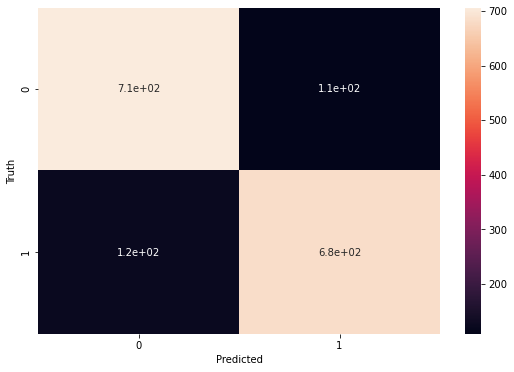

In [38]:
#seaborn is a library that can be used to improve the appearance of charts and graphs
import seaborn as sb

#draw a 10x7 figure, with labels on both axes, of "Predicted" and "Actual" respectively
plt.figure(figsize = (9, 6))
sb.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

While the above type of chart is more suited to a matrix with more data values, it is still a handy visualisation for this purpose.

### Interpretation of Results

It was determined that, to accurately predict whether a wild mushroom is edible or poisonous, Logistic Regression is the most reliable predictive model to use. Linear Regression cannot be used in this case as it is ill-suited to categorical data, and better suited to continuous data, such as property prices (Jing, 2019).

The model could also be made even more accurate with the inclusion of every single feature originally included in the dataset. This would more safely guarantee the edibility of a mushroom; however, including every single feature would make the process extremely time-consuming. In a real-world context, though, I would deem it absolutely necessary to include every feature - mistaking a poisonous mushroom for an edible one would be a fatal mistake.

### References

Analytics Vidhya. (2020a, March 5). Categorical Encoding | One Hot Encoding vs Label Encoding. Retrieved January 13, 2022, from Analytics Vidhya website: https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/

Analytics Vidhya. (2020b, March 19). Multicollinearity | Detecting Multicollinearity with VIF. Retrieved May 12, 2022, from Analytics Vidhya website: https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/#:~:text=Multicollinearity%20occurs%20when%20two%20or,variable%20in%20a%20regression%20model.

Analytics Vidhya. (2021, May 25). Linear Regression | Introduction to Linear Regression for Data Science. Retrieved May 12, 2022, from Analytics Vidhya website: https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/#:~:text=In%20the%20most%20simple%20words,the%20dependent%20and%20independent%20variable.

Brindle, D. (2021, July 4). Edible vs Poisonous Mushrooms – What Is The Difference? – reThinkSurvival.com. Retrieved May 12, 2022, from Rethinksurvival.com website: https://rethinksurvival.com/edible-vs-poisonous-mushrooms-what-is-the-difference/

Brownlee, J. (2020, July 23). Train-Test Split for Evaluating Machine Learning Algorithms. Retrieved May 12, 2022, from Machine Learning Mastery website: https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/#:~:text=The%20train%2Dtest%20split%20is,dividing%20it%20into%20two%20subsets.

Deziel, C. (2021). How to Identify Wild Mushrooms in North Carolina. Retrieved May 12, 2022, from Sciencing website: https://sciencing.com/identify-wild-mushrooms-north-carolina-6508092.html

Jing, H. (2019, May 7). Why Linear Regression is not suitable for Classification. Retrieved May 12, 2022, from Medium website: https://towardsdatascience.com/why-linear-regression-is-not-suitable-for-binary-classification-c64457be8e28

pandas.get_dummies — pandas 1.4.2 documentation. (2022). Retrieved May 12, 2022, from Pydata.org website: https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

Rosencrance, L., & Burns, E. (2017). logistic regression. Retrieved January 13, 2022, from SearchBusinessAnalytics website: https://searchbusinessanalytics.techtarget.com/definition/logistic-regression

UCI Machine Learning Repository: Mushroom Data Set. (2022). Retrieved May 12, 2022, from Uci.edu website: https://archive.ics.uci.edu/ml/datasets/mushroom